In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

In [3]:
fdata = pd.read_csv("fuji_per_healpix-vs-sdss-results.csv")
fdata

,targetid,ra_1,dec_1,ppxf_sigma,ppxf_sigma_error,DER_SNR,snr_ppxf,objid_2,ra_2,dec_2,h_alpha_eqw,sigmaStars,sigmaStarsErr,veldisp,veldispErr
0,39628417112478213,192.260477,26.893112,138.971914,1.383833,50.328238,37.098634,1237667322722975777,192.260475,26.893130,-0.276066,131.19620,2.446620,123.31250,2.796156
1,39627769709071900,184.913600,-0.750861,149.062907,1.541831,55.533676,33.891261,1237654669214023822,184.913612,-0.750832,-0.251797,133.23210,3.595464,129.34720,3.885587
2,39628422523128777,193.922076,27.250763,270.979718,1.667840,76.538311,31.694018,1237667323260502019,193.922068,27.250765,-0.256416,249.99830,3.095356,251.30850,3.608889
3,39628438608283113,194.221420,27.929491,201.428815,1.704093,59.108758,30.380667,1237667444048396324,194.221408,27.929497,-0.283523,203.63750,3.266631,186.16700,3.728426
4,39632940354767051,155.787603,32.907518,189.826232,2.438502,39.998815,29.214919,1237664877807730696,155.787606,32.907530,-0.302244,198.60010,4.244899,180.25100,4.895857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4216,39633149717645372,246.293085,43.878614,98.764083,26.679481,2.524427,0.827875,1237655349431763143,246.293071,43.878616,-3.075022,109.83120,12.361460,110.71750,12.234250
4217,39627818572713944,217.429927,1.262170,58.403387,27.061392,2.136285,0.824143,1237651735236444413,217.429960,1.262166,-5.329380,75.07372,12.944650,77.86646,14.670870
4218,39633355574084016,179.132846,57.417037,99.830487,39.122503,2.054152,0.783272,1237661353242787960,179.132864,57.417040,-2.267196,177.63310,18.524540,163.74730,22.613850
4219,39633307725466372,173.525018,53.919783,144.551081,53.371950,1.202601,0.564747,1237657589783593038,173.524967,53.919728,-23.996330,146.27330,17.888650,151.14700,20.890950


In [4]:
# fdata = fdata.drop(fdata[fdata.ppxf_sigma_error/fdata.ppxf_sigma > 0.1].index)
# fdata

In [6]:
ppxf_sigma = fdata.ppxf_sigma
ppxf_sigma_error = fdata.ppxf_sigma_error
sigmaStars = fdata.sigmaStars
sigmaStarsErr = fdata.sigmaStarsErr
veldisp = fdata.veldisp
veldispErr = fdata.veldispErr
sigma_sdss_m = (fdata.sigmaStars+fdata.veldisp)/2
sigma_sdss_e_m = np.sqrt(fdata.sigmaStarsErr**2. + fdata.veldispErr**2.)
pull_pipe_1 = (ppxf_sigma - veldisp)/(np.sqrt((ppxf_sigma_error*ppxf_sigma_error)+(veldispErr*veldispErr)))
pull_pipe_2 = (ppxf_sigma - sigmaStars)/(np.sqrt((ppxf_sigma_error*ppxf_sigma_error)+(sigmaStarsErr*sigmaStarsErr)))
pull_pipe_m = (ppxf_sigma - sigma_sdss_m)/(np.sqrt((ppxf_sigma_error*ppxf_sigma_error)+(sigma_sdss_e_m*sigma_sdss_e_m)))

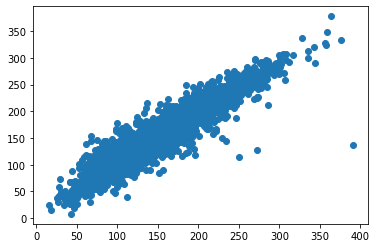

In [7]:
plt.scatter(ppxf_sigma,sigmaStars)
plt.show()

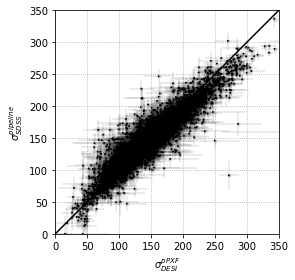

In [8]:
fig, ax = plt.subplots()
ax.set_ylim(0.0,350.0)
ax.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax.errorbar(ppxf_sigma,veldisp,xerr=ppxf_sigma_error,yerr=veldispErr,fmt=".k",alpha=0.1)
ax.scatter(ppxf_sigma,veldisp,color='black',edgecolor='none',s=3.5)
ax.plot(xxx,yyy,color="black")
ax.set_aspect(1)
ax.set_xlabel(r'$\sigma_{DESI}^{pPXF}$')
ax.set_ylabel(r'$\sigma_{SDSS}^{pipeline}$')
plt.grid(b=True, which='both', color='0.65',linestyle=':')
#plt.legend()#,frameon=False)
plt.tight_layout()
#plt.savefig('sigma_desi_sigmastars.png')
plt.show()

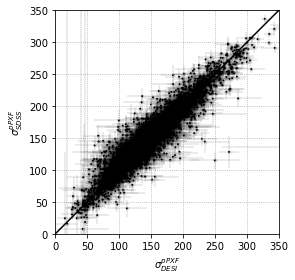

In [9]:
fig, ax = plt.subplots()
ax.set_ylim(0.0,350.0)
ax.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax.errorbar(ppxf_sigma,sigmaStars,xerr=ppxf_sigma_error,yerr=sigmaStarsErr,fmt=".k",alpha=0.1)
ax.scatter(ppxf_sigma,sigmaStars,color='black',edgecolor='none',s=3.5)
ax.plot(xxx,yyy,color="black")
ax.set_aspect(1)
ax.set_xlabel(r'$\sigma_{DESI}^{pPXF}$')
ax.set_ylabel(r'$\sigma_{SDSS}^{pPXF}$')
plt.grid(b=True, which='both', color='0.65',linestyle=':')
#plt.legend()#,frameon=False)
plt.tight_layout()
#plt.savefig('sigma_desi_sigmastars.png')
plt.show()

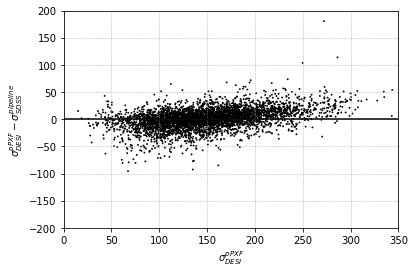

In [10]:
plt.ylim(-200,200)
plt.xlim(0.0,350.0)
plt.scatter(ppxf_sigma,ppxf_sigma-veldisp,color='black',edgecolor='none',s=3.5)
plt.axhline(y=0.0,color="black")
plt.grid(b=True, which='both', color='0.65',linestyle=':')
plt.xlabel(r'$\sigma_{DESI}^{pPXF}$')
plt.ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pipeline}$')
#plt.savefig('sigma_P_minus_S.png')
plt.show()

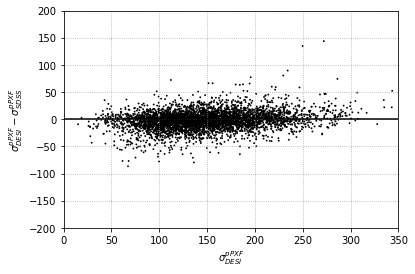

In [11]:
plt.ylim(-200,200)
plt.xlim(0.0,350.0)
plt.scatter(ppxf_sigma,ppxf_sigma-sigmaStars,color='black',edgecolor='none',s=3.5)
plt.axhline(y=0.0,color="black")
plt.grid(b=True, which='both', color='0.65',linestyle=':')
plt.xlabel(r'$\sigma_{DESI}^{pPXF}$')
plt.ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pPXF}$')
#plt.savefig('sigma_P_minus_S.png')
plt.show()

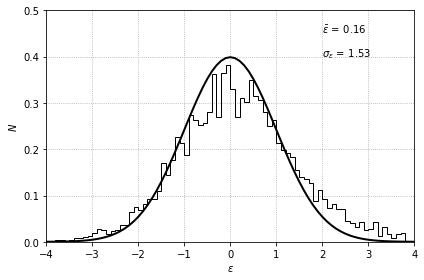

In [15]:
plt.ylim(0.0,0.5)
plt.xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = plt.hist(pull_pipe_1,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = plt.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
plt.grid(b=True, which='both', color='0.65',linestyle=':')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$N$')
plt.text(2.0,0.45,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_1))+'$')#, fontname = 'Times New Roman',size=20)
plt.text(2.0,0.4,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_1))+'$')#, fontname = 'Times New Roman',size=20)
#plt.legend(fontsize=16)
plt.tight_layout()
#plt.savefig('pull-distribution_internal.pdf')
#plt.savefig('pull-distribution_internal.png')
plt.show()

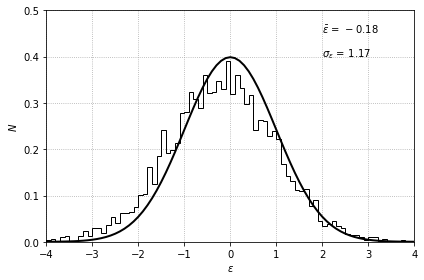

In [16]:
plt.ylim(0.0,0.5)
plt.xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = plt.hist(pull_pipe_2,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = plt.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
plt.grid(b=True, which='both', color='0.65',linestyle=':')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$N$')
plt.text(2.0,0.45,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_2))+'$')#, fontname = 'Times New Roman',size=20)
plt.text(2.0,0.4,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_2))+'$')#, fontname = 'Times New Roman',size=20)
#plt.legend(fontsize=16)
plt.tight_layout()
#plt.savefig('pull-distribution_internal.pdf')
#plt.savefig('pull-distribution_internal.png')
plt.show()

In [17]:
f_l = pd.read_csv("fuji_lamost.csv")
f_l[:10]

,targetid,ra_1,dec_1,ppxf_sigma,ppxf_sigma_error,DER_SNR,snr_ppxf,obsid,ra_2,dec_2,specname,veldisp,veldisp_err,snrg,snrr,snri
0,39628438608283113,194.221420,27.929491,201.428815,1.704093,59.108758,30.380667,301804166,194.221450,27.929517,spec-57044-HD125932N280356B01_sp04-166.fits,204.0,3.0,57.68,98.14,126.71
1,39628443939243735,193.999798,28.186935,150.801531,1.962831,45.228387,28.515099,301803169,194.000023,28.186870,spec-57044-HD125932N280356B01_sp03-169.fits,153.0,3.0,33.84,50.14,83.52
2,39628422497963985,192.286821,27.368747,169.286710,1.931925,43.583631,28.185122,144510096,192.286830,27.368743,spec-56396-HD125932N280356F01_sp10-096.fits,165.0,3.0,30.29,34.20,56.21
3,39627769679713314,183.210951,-0.836999,96.388279,1.493434,36.287797,27.371505,199807060,183.210980,-0.836977,spec-56654-HD120800N003716B01_sp07-060.fits,88.0,3.0,15.49,30.52,35.38
4,39628443956022818,195.217035,28.366121,182.042481,1.913866,40.114182,27.370550,235904051,195.217020,28.366120,spec-56769-VB194N28V1_sp04-051.fits,166.0,4.0,18.41,35.04,56.04
5,39628411752156938,194.757615,26.815660,230.255531,3.075853,38.141929,26.653628,236005043,194.757530,26.815657,spec-56769-VB194N28V2_sp05-043.fits,224.0,4.0,21.39,52.63,73.96
6,39628427900225097,194.142478,27.538965,164.784607,2.067014,39.001525,26.155518,236003010,194.142430,27.538961,spec-56769-VB194N28V2_sp03-010.fits,161.0,3.0,24.91,39.19,63.72
7,39628433277322723,195.323331,27.809090,203.226170,2.786018,38.411174,25.703834,235904117,195.323330,27.809006,spec-56769-VB194N28V1_sp04-117.fits,195.0,3.0,33.23,60.92,94.28
8,39628459881793324,194.915779,28.926566,165.846742,2.838370,35.623140,25.537105,236015111,194.915740,28.926571,spec-56769-VB194N28V2_sp15-111.fits,164.0,5.0,19.39,34.29,53.00
9,39628438633449214,195.937269,28.084211,168.177420,2.594123,40.520447,25.239801,235908035,195.937280,28.084185,spec-56769-VB194N28V1_sp08-035.fits,151.0,5.0,16.78,41.60,59.31


In [18]:
f_g = pd.read_csv("fuji_gama.csv")
f_g[:3]

,targetid,ra_1,dec_1,ppxf_sigma,ppxf_sigma_error,DER_SNR,snr_ppxf,CATAID_1,SPECID_1,SURVEY_1,SIGSTARCORR,SIGERRSTARCORR
0,39627787807490423,183.516522,-0.069647,92.801843,2.048008,28.323281,21.220779,585584,G12_Y1_FT_003,GAMA,63.117904,9.158942
1,39627745407271782,176.286414,-1.803845,88.612741,2.410858,22.712142,18.478639,136871,G12_Y6_073_144,GAMA,57.927636,13.230152
2,39627794413523072,217.438248,0.253038,189.258549,3.267075,27.356583,8.495166,618938,G15_Y6_089_296,GAMA,166.326129,11.647365


In [19]:
pull_pipe_3 = (f_l.ppxf_sigma - f_l.veldisp)/(np.sqrt((f_l.ppxf_sigma_error*f_l.ppxf_sigma_error)+(f_l.veldisp_err*f_l.veldisp_err)))
pull_pipe_4 = (f_g.ppxf_sigma - f_g.SIGSTARCORR)/(np.sqrt((f_g.ppxf_sigma_error*f_g.ppxf_sigma_error)+(f_g.SIGERRSTARCORR*f_g.SIGERRSTARCORR)))

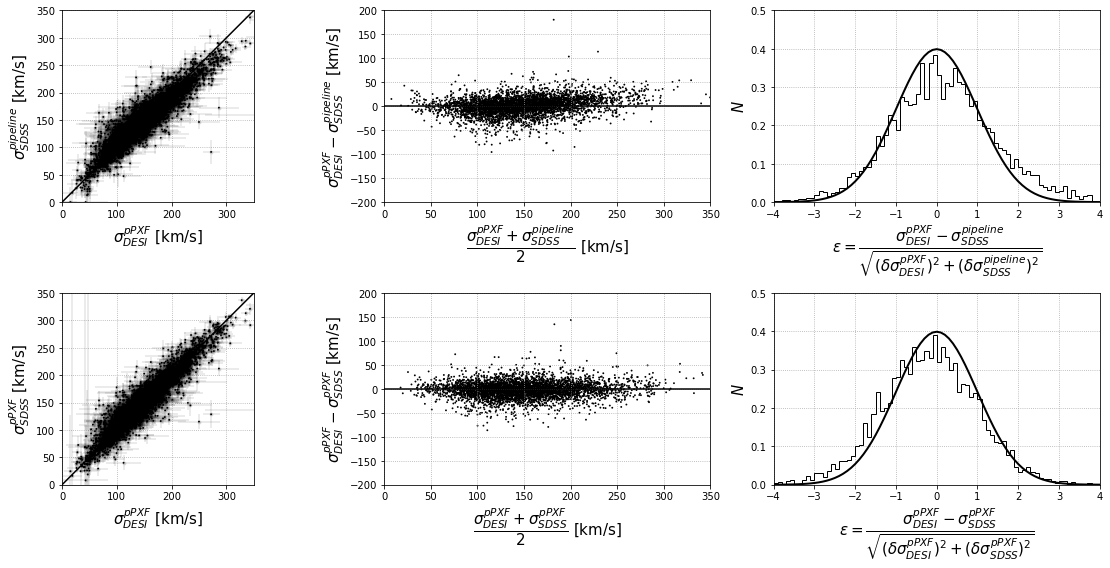

In [20]:
f_1, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows=2,ncols=3, figsize=(16, 8),sharex=False, sharey=False)
ax1.set_ylim(0.0,350.0)
ax1.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax1.errorbar(ppxf_sigma,veldisp,xerr=ppxf_sigma_error,yerr=veldispErr,fmt=".k",alpha=0.1)
ax1.scatter(ppxf_sigma,veldisp,color='black',edgecolor='none',s=3.5)
ax1.plot(xxx,yyy,color="black")
ax1.set_aspect(1)
ax1.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax1.set_ylabel(r'$\sigma_{SDSS}^{pipeline}$ [km/s]',size=15)
ax1.grid(b=True, which='both', color='0.65',linestyle=':')

ax4.set_ylim(0.0,350.0)
ax4.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax4.errorbar(ppxf_sigma,sigmaStars,xerr=ppxf_sigma_error,yerr=sigmaStarsErr,fmt=".k",alpha=0.1)
ax4.scatter(ppxf_sigma,sigmaStars,color='black',edgecolor='none',s=3.5)
ax4.plot(xxx,yyy,color="black")
ax4.set_aspect(1)
ax4.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax4.set_ylabel(r'$\sigma_{SDSS}^{pPXF}$ [km/s]',size=15)
ax4.grid(b=True, which='both', color='0.65',linestyle=':')

ax2.set_ylim(-200,200)
ax2.set_xlim(0.0,350.0)
ax2.scatter(((ppxf_sigma+veldisp)/2.),ppxf_sigma-veldisp,color='black',edgecolor='none',s=3.5)
ax2.axhline(y=0.0,color="black")
ax2.grid(b=True, which='both', color='0.65',linestyle=':')
ax2.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{SDSS}^{pipeline}}{2}$ [km/s]',size=15)
ax2.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pipeline}$ [km/s]',size=15)

ax5.set_ylim(-200,200)
ax5.set_xlim(0.0,350.0)
ax5.scatter(((ppxf_sigma+sigmaStars)/2.),ppxf_sigma-sigmaStars,color='black',edgecolor='none',s=3.5)
ax5.axhline(y=0.0,color="black")
ax5.grid(b=True, which='both', color='0.65',linestyle=':')
ax5.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{SDSS}^{pPXF}}{2}$ [km/s]',size=15)
ax5.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pPXF}$ [km/s]',size=15)

ax3.set_ylim(0.0,0.5)
ax3.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax3.hist(pull_pipe_1,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax3.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax3.grid(b=True, which='both', color='0.65',linestyle=':')
ax3.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pipeline}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{SDSS}^{pipeline})^2}}$',size=15)
ax3.set_ylabel(r'$N$',size=15)
# ax3.text(2.0,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_1))+'$',size=15)
# ax3.text(2.0,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_1))+'$',size=15)#, fontname = 'Times New Roman',size=20)
# ax3.text(2.0,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_1))+'$',size=15)#, fontname = 'Times New Roman',size=20)

ax6.set_ylim(0.0,0.5)
ax6.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax6.hist(pull_pipe_2,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax6.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax6.grid(b=True, which='both', color='0.65',linestyle=':')
ax6.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pPXF}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{SDSS}^{pPXF})^2}}$',size=15)
ax6.set_ylabel(r'$N$',size=15)
# ax6.text(2.0,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_2))+'$',size=15)
# ax6.text(2.0,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_2))+'$',size=15)#, fontname = 'Times New Roman',size=20)
# ax6.text(2.0,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_2))+'$',size=15)#, fontname = 'Times New Roman',size=20)

plt.tight_layout()
plt.savefig('external_consistency_v2.png')
plt.savefig('external_consistency_v2.pdf')
plt.show()

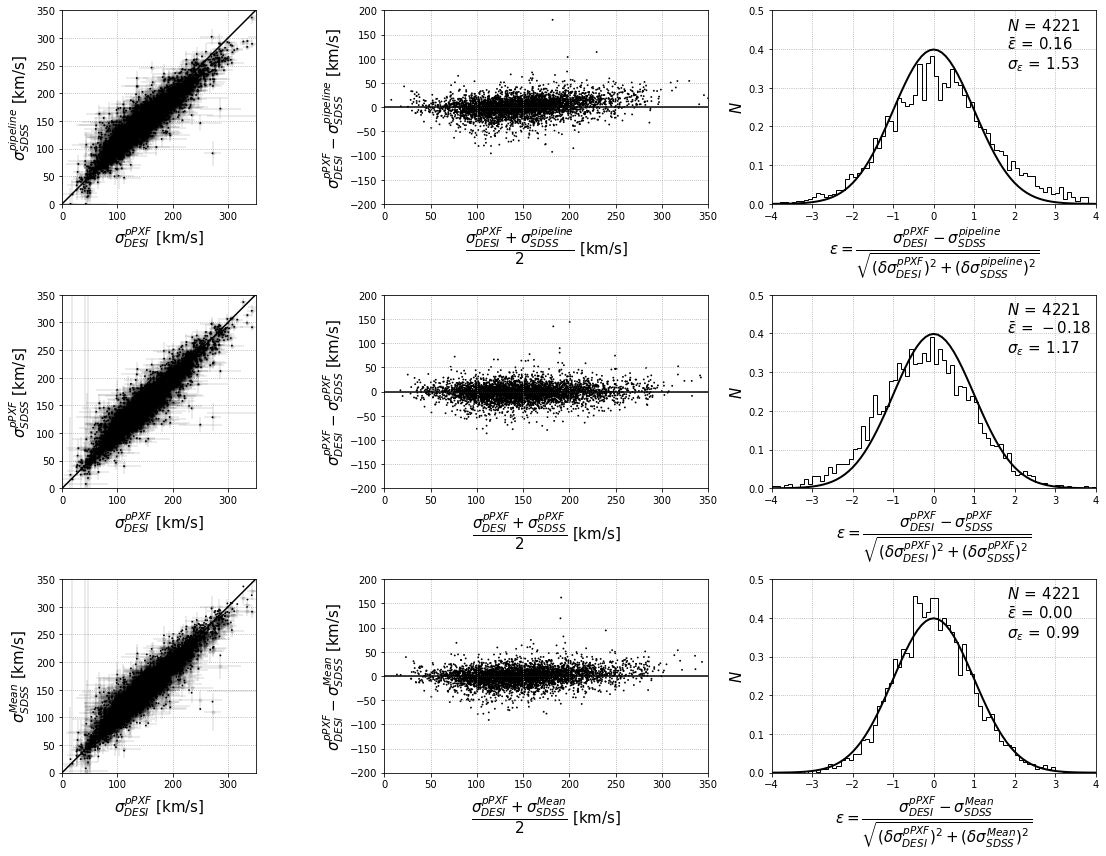

In [27]:
f_1, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7,ax8,ax9)) = plt.subplots(nrows=3,ncols=3, figsize=(16, 12),sharex=False, sharey=False)
ax1.set_ylim(0.0,350.0)
ax1.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax1.errorbar(ppxf_sigma,veldisp,xerr=ppxf_sigma_error,yerr=veldispErr,fmt=".k",alpha=0.1)
ax1.scatter(ppxf_sigma,veldisp,color='black',edgecolor='none',s=3.5)
ax1.plot(xxx,yyy,color="black")
ax1.set_aspect(1)
ax1.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax1.set_ylabel(r'$\sigma_{SDSS}^{pipeline}$ [km/s]',size=15)
ax1.grid(b=True, which='both', color='0.65',linestyle=':')

ax4.set_ylim(0.0,350.0)
ax4.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax4.errorbar(ppxf_sigma,sigmaStars,xerr=ppxf_sigma_error,yerr=sigmaStarsErr,fmt=".k",alpha=0.1)
ax4.scatter(ppxf_sigma,sigmaStars,color='black',edgecolor='none',s=3.5)
ax4.plot(xxx,yyy,color="black")
ax4.set_aspect(1)
ax4.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax4.set_ylabel(r'$\sigma_{SDSS}^{pPXF}$ [km/s]',size=15)
ax4.grid(b=True, which='both', color='0.65',linestyle=':')

ax7.set_ylim(0.0,350.0)
ax7.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax7.errorbar(ppxf_sigma,sigma_sdss_m,xerr=ppxf_sigma_error,yerr=sigma_sdss_e_m,fmt=".k",alpha=0.1)
ax7.scatter(ppxf_sigma,sigmaStars,color='black',edgecolor='none',s=3.5)
ax7.plot(xxx,yyy,color="black")
ax7.set_aspect(1)
ax7.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax7.set_ylabel(r'$\sigma_{SDSS}^{Mean}$ [km/s]',size=15)
ax7.grid(b=True, which='both', color='0.65',linestyle=':')

ax2.set_ylim(-200,200)
ax2.set_xlim(0.0,350.0)
ax2.scatter(((ppxf_sigma+veldisp)/2.),ppxf_sigma-veldisp,color='black',edgecolor='none',s=3.5)
ax2.axhline(y=0.0,color="black")
ax2.grid(b=True, which='both', color='0.65',linestyle=':')
ax2.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{SDSS}^{pipeline}}{2}$ [km/s]',size=15)
ax2.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pipeline}$ [km/s]',size=15)

ax5.set_ylim(-200,200)
ax5.set_xlim(0.0,350.0)
ax5.scatter(((ppxf_sigma+sigmaStars)/2.),ppxf_sigma-sigmaStars,color='black',edgecolor='none',s=3.5)
ax5.axhline(y=0.0,color="black")
ax5.grid(b=True, which='both', color='0.65',linestyle=':')
ax5.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{SDSS}^{pPXF}}{2}$ [km/s]',size=15)
ax5.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pPXF}$ [km/s]',size=15)

ax8.set_ylim(-200,200)
ax8.set_xlim(0.0,350.0)
ax8.scatter(((ppxf_sigma+sigma_sdss_m)/2.),ppxf_sigma-sigma_sdss_m,color='black',edgecolor='none',s=3.5)
ax8.axhline(y=0.0,color="black")
ax8.grid(b=True, which='both', color='0.65',linestyle=':')
ax8.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{SDSS}^{Mean}}{2}$ [km/s]',size=15)
ax8.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{Mean}$ [km/s]',size=15)

ax3.set_ylim(0.0,0.5)
ax3.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax3.hist(pull_pipe_1,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax3.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax3.grid(b=True, which='both', color='0.65',linestyle=':')
ax3.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pipeline}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{SDSS}^{pipeline})^2}}$',size=15)
ax3.set_ylabel(r'$N$',size=15)
ax3.text(2.0-0.2,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_1))+'$',size=15)
ax3.text(2.0-0.2,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_1))+'$',size=15)#, fontname = 'Times New Roman',size=20)
ax3.text(2.0-0.2,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_1))+'$',size=15)#, fontname = 'Times New Roman',size=20)

ax6.set_ylim(0.0,0.5)
ax6.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax6.hist(pull_pipe_2,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax6.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax6.grid(b=True, which='both', color='0.65',linestyle=':')
ax6.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pPXF}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{SDSS}^{pPXF})^2}}$',size=15)
ax6.set_ylabel(r'$N$',size=15)
ax6.text(2.0-0.2,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_2))+'$',size=15)
ax6.text(2.0-0.2,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_2))+'$',size=15)#, fontname = 'Times New Roman',size=20)
ax6.text(2.0-0.2,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_2))+'$',size=15)#, fontname = 'Times New Roman',size=20)

ax9.set_ylim(0.0,0.5)
ax9.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax9.hist(pull_pipe_m,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax9.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax9.grid(b=True, which='both', color='0.65',linestyle=':')
ax9.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{Mean}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{SDSS}^{Mean})^2}}$',size=15)
ax9.set_ylabel(r'$N$',size=15)
ax9.text(2.0-0.2,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_m))+'$',size=15)
ax9.text(2.0-0.2,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_m))+'$',size=15)#, fontname = 'Times New Roman',size=20)
ax9.text(2.0-0.2,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_m))+'$',size=15)#, fontname = 'Times New Roman',size=20)



plt.tight_layout()
plt.savefig('external_consistency_v3.png')
plt.savefig('external_consistency_v3.pdf')
plt.show()

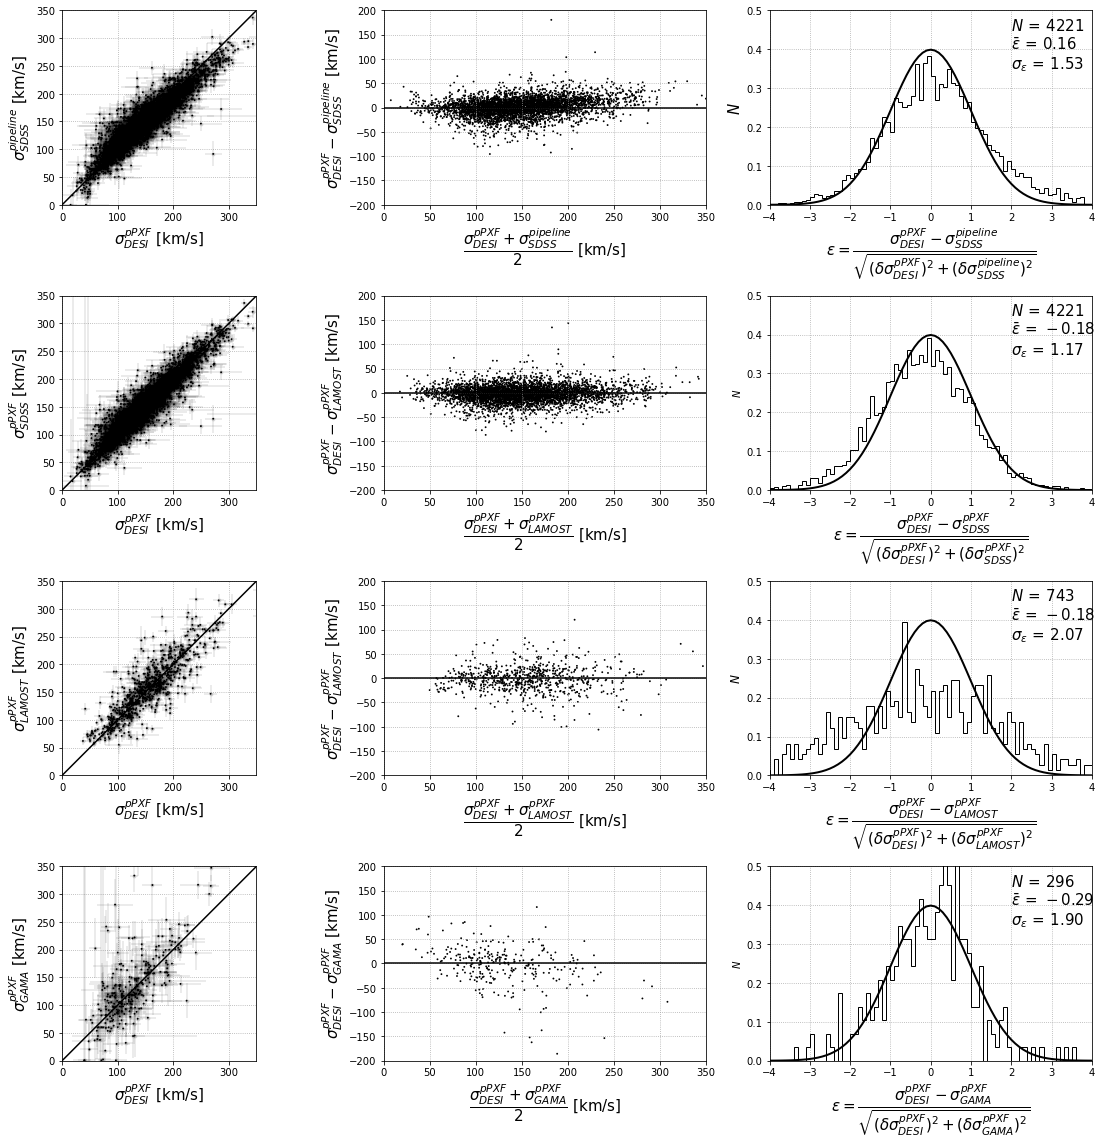

In [16]:
f_1, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9),(ax10, ax11, ax12)) = plt.subplots(nrows=4,ncols=3, figsize=(16, 16),sharex=False, sharey=False)
ax1.set_ylim(0.0,350.0)
ax1.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax1.errorbar(ppxf_sigma,veldisp,xerr=ppxf_sigma_error,yerr=veldispErr,fmt=".k",alpha=0.1)
ax1.scatter(ppxf_sigma,veldisp,color='black',edgecolor='none',s=3.5)
ax1.plot(xxx,yyy,color="black")
ax1.set_aspect(1)
ax1.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax1.set_ylabel(r'$\sigma_{SDSS}^{pipeline}$ [km/s]',size=15)
ax1.grid(b=True, which='both', color='0.65',linestyle=':')

ax4.set_ylim(0.0,350.0)
ax4.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax4.errorbar(ppxf_sigma,sigmaStars,xerr=ppxf_sigma_error,yerr=sigmaStarsErr,fmt=".k",alpha=0.1)
ax4.scatter(ppxf_sigma,sigmaStars,color='black',edgecolor='none',s=3.5)
ax4.plot(xxx,yyy,color="black")
ax4.set_aspect(1)
ax4.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax4.set_ylabel(r'$\sigma_{SDSS}^{pPXF}$ [km/s]',size=15)
ax4.grid(b=True, which='both', color='0.65',linestyle=':')

ax7.set_ylim(0.0,350.0)
ax7.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax7.errorbar(f_l.ppxf_sigma,f_l.veldisp,xerr=f_l.ppxf_sigma_error,yerr=f_l.veldisp_err,fmt=".k",alpha=0.1)
ax7.scatter(f_l.ppxf_sigma,f_l.veldisp,color='black',edgecolor='none',s=3.5)
ax7.plot(xxx,yyy,color="black")
ax7.set_aspect(1)
ax7.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax7.set_ylabel(r'$\sigma_{LAMOST}^{pPXF}$ [km/s]',size=15)
ax7.grid(b=True, which='both', color='0.65',linestyle=':')

ax10.set_ylim(0.0,350.0)
ax10.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax10.errorbar(f_g.ppxf_sigma,f_g.SIGSTARCORR,xerr=f_g.ppxf_sigma_error,yerr=f_g.SIGERRSTARCORR,fmt=".k",alpha=0.1)
ax10.scatter(f_g.ppxf_sigma,f_g.SIGSTARCORR,color='black',edgecolor='none',s=3.5)
ax10.plot(xxx,yyy,color="black")
ax10.set_aspect(1)
ax10.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax10.set_ylabel(r'$\sigma_{GAMA}^{pPXF}$ [km/s]',size=15)
ax10.grid(b=True, which='both', color='0.65',linestyle=':')

ax2.set_ylim(-200,200)
ax2.set_xlim(0.0,350.0)
ax2.scatter(((ppxf_sigma+veldisp)/2.),ppxf_sigma-veldisp,color='black',edgecolor='none',s=3.5)
ax2.axhline(y=0.0,color="black")
ax2.grid(b=True, which='both', color='0.65',linestyle=':')
ax2.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{SDSS}^{pipeline}}{2}$ [km/s]',size=15)
ax2.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pipeline}$ [km/s]',size=15)

ax5.set_ylim(-200,200)
ax5.set_xlim(0.0,350.0)
ax5.scatter(((ppxf_sigma+sigmaStars)/2.),ppxf_sigma-sigmaStars,color='black',edgecolor='none',s=3.5)
ax5.axhline(y=0.0,color="black")
ax5.grid(b=True, which='both', color='0.65',linestyle=':')
ax5.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{LAMOST}^{pPXF}}{2}$ [km/s]',size=15)
ax5.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{LAMOST}^{pPXF}$ [km/s]',size=15)

ax8.set_ylim(-200,200)
ax8.set_xlim(0.0,350.0)
ax8.scatter(((f_l.ppxf_sigma+f_l.veldisp)/2.),f_l.ppxf_sigma-f_l.veldisp,color='black',edgecolor='none',s=3.5)
ax8.axhline(y=0.0,color="black")
ax8.grid(b=True, which='both', color='0.65',linestyle=':')
ax8.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{LAMOST}^{pPXF}}{2}$ [km/s]',size=15)
ax8.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{LAMOST}^{pPXF}$ [km/s]',size=15)

ax11.set_ylim(-200,200)
ax11.set_xlim(0.0,350.0)
ax11.scatter(((f_g.ppxf_sigma+f_g.SIGSTARCORR)/2.),f_g.ppxf_sigma-f_g.SIGSTARCORR,color='black',edgecolor='none',s=3.5)
ax11.axhline(y=0.0,color="black")
ax11.grid(b=True, which='both', color='0.65',linestyle=':')
ax11.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{GAMA}^{pPXF}}{2}$ [km/s]',size=15)
ax11.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{GAMA}^{pPXF}$ [km/s]',size=15)

ax3.set_ylim(0.0,0.5)
ax3.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax3.hist(pull_pipe_1,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax3.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax3.grid(b=True, which='both', color='0.65',linestyle=':')
ax3.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pipeline}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{SDSS}^{pipeline})^2}}$',size=15)
ax3.set_ylabel(r'$N$',size=15)
ax3.text(2.0,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_1))+'$',size=15)
ax3.text(2.0,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_1))+'$',size=15)#, fontname = 'Times New Roman',size=20)
ax3.text(2.0,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_1))+'$',size=15)#, fontname = 'Times New Roman',size=20)

ax6.set_ylim(0.0,0.5)
ax6.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax6.hist(pull_pipe_2,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax6.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax6.grid(b=True, which='both', color='0.65',linestyle=':')
ax6.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pPXF}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{SDSS}^{pPXF})^2}}$',size=15)
ax6.set_ylabel(r'$N$')
ax6.text(2.0,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_2))+'$',size=15)
ax6.text(2.0,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_2))+'$',size=15)#, fontname = 'Times New Roman',size=20)
ax6.text(2.0,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_2))+'$',size=15)#, fontname = 'Times New Roman',size=20)

ax9.set_ylim(0.0,0.5)
ax9.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax9.hist(pull_pipe_3,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax9.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax9.grid(b=True, which='both', color='0.65',linestyle=':')
ax9.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{LAMOST}^{pPXF}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{LAMOST}^{pPXF})^2}}$',size=15)
ax9.set_ylabel(r'$N$',size=12)
ax9.text(2.0,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_3))+'$',size=15)
ax9.text(2.0,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_3))+'$',size=15)#, fontname = 'Times New Roman',size=20)
ax9.text(2.0,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_3))+'$',size=15)#, fontname = 'Times New Roman',size=20)

ax12.set_ylim(0.0,0.5)
ax12.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax12.hist(pull_pipe_4,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax12.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax12.grid(b=True, which='both', color='0.65',linestyle=':')
ax12.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{GAMA}^{pPXF}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{GAMA}^{pPXF})^2}}$',size=15)
ax12.set_ylabel(r'$N$')
ax12.text(2.0,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_4))+'$',size=15)
ax12.text(2.0,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_4))+'$',size=15)#, fontname = 'Times New Roman',size=20)
ax12.text(2.0,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_4))+'$',size=15)#, fontname = 'Times New Roman',size=20)

plt.tight_layout()
plt.savefig('external_consistency.png')
plt.savefig('external_consistency.pdf')
plt.show()